## Code to overlay the iris mask on the original image and to display the iris image with the mask overlayed on it with 50% transparency

In [ ]:
## Code to overlay the iris mask on the original image and to display the iris image with the mask overlayed on it with 50% transparency
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Load the original image and the iris mask
original_image = cv2.imread('/home/nishkal/alam/iris_normalization/iris_db/IITD_v1/orig/1_L/1_L_1.bmp')
iris_mask = cv2.imread('/home/nishkal/alam/iris_normalization/iris_db/IITD_v1/mask_irisseg/1_L/1_L_1.tiff', cv2.IMREAD_UNCHANGED)
def save_overlay_image(original_image, iris_mask, out_file):
    iris_mask_colored = cv2.cvtColor(iris_mask, cv2.COLOR_GRAY2BGR)
    # set the color of the mask to red
    iris_mask_colored[np.where((iris_mask_colored != [0, 0, 0]).all(axis=2))] = [200, 0, 0]
    overlay = cv2.addWeighted(original_image, 0.9, iris_mask_colored, 0.8, 1)
    # show overlay image without axis
    # plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255, aspect='auto', interpolation='nearest')
    cv2.imwrite(out_file, overlay)


True

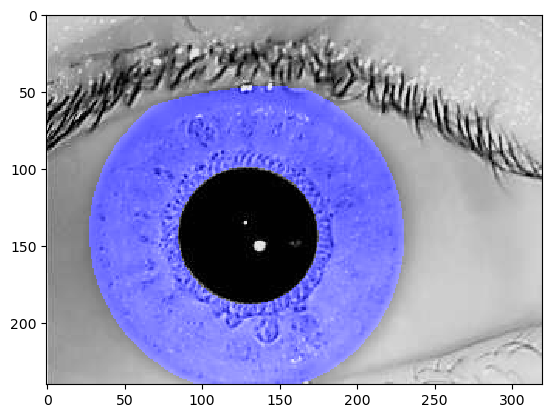

In [ ]:

# Ensure the mask has an alpha channel


# Overlay the iris mask on the original image
overlay = original_image.copy()
for c in range(0, 3):
    overlay[:, :, c] = overlay[:, :, c] * (1 - iris_mask[:, :, 3] / 255.0) + iris_mask[:, :, c] * (iris_mask[:, :, 3] / 255.0)

# Display the original image and the overlay
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Iris Mask Overlay')
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Save the overlay image
cv2.imwrite('overlay/overlay_image.png', overlay)